## 1. Xem dữ liệu khuyết

In [1]:
library(tidyverse)
library(VIM)

aida <- read.csv(file="datasets/AIDA_expamle.csv")
aida <- aida |> janitor::clean_names()
glimpse(aida)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




Rows: 1,248
Columns: 15
$ cid         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ province    <chr> "Alessandria", "Milano", "Milano", "Alessandria", "Vicenza…
$ revenue     <int> 207918, 160615, 146019, 141401, 126609, 121147, 89497, 824…
$ employees   <int> 454, 259, 403, 304, 84, 132, 57, 59, 67, 110, 75, 102, 12,…
$ total_asset <int> 165588, 97147, 127722, 224664, 45174, 48912, 16707, 23785,…
$ profit      <int> 10691, 5348, 3341, -871, 3164, 1823, 339, 732, 5573, -5158…
$ roa         <dbl> 11.09, 10.07, 16.75, 1.10, 10.22, 6.12, 3.79, 1.02, 9.63, …
$ roe         <dbl> 25.97, 29.73, 4.56, -1.03, 13.12, 9.30, 5.93, 12.75, 17.25…
$ p_l_o       <dbl> 58.24, 54.64, 15.62, -35.38, 68.54, 60.86, 53.51, 301.52, …
$ roi         <dbl> NA, NA, 29.19, 1.74, 10.91, 6.73, 4.71, 1.24, 16.84, NA, N…
$ ros         <dbl> 8.82, 6.08, 14.51, 1.72, 3.64, 2.46, 0.71, 0.29, 11.58, -5…
$ debt_equity <dbl> 0.00, 0.00, 0.00, 0.56, 0.46, 1.27, 1.36, 2.42, 0.59, 0.00…
$ cl_ta       <d

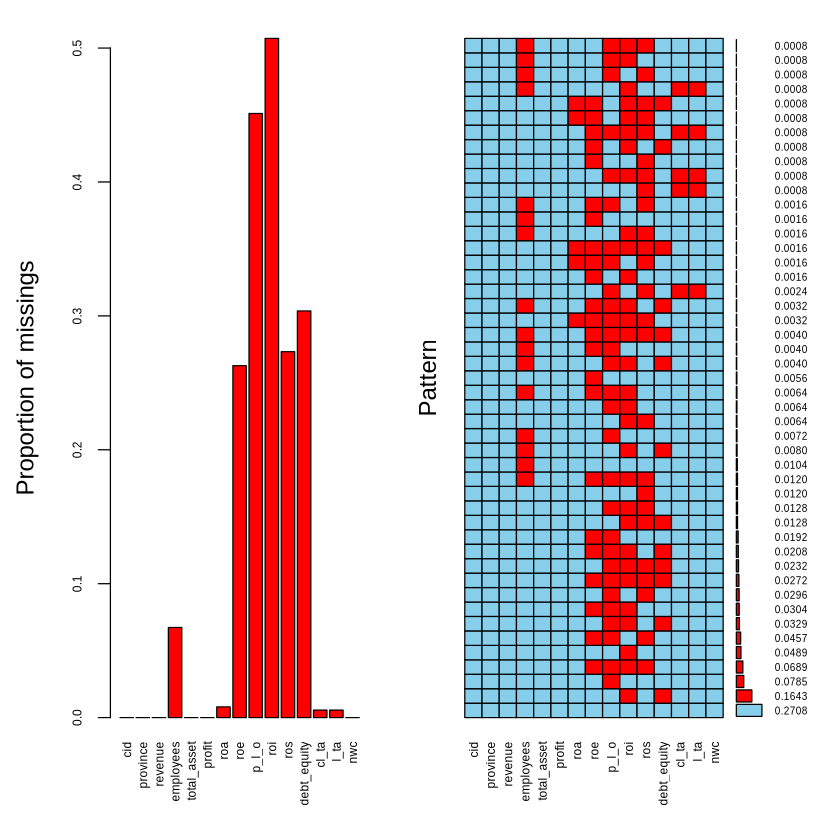

In [2]:
aggr(aida, ylab = c("Proportion of missings", "Pattern"), number=TRUE, cex.axis=0.6, cex.numbers=0.5)

- Biểu đồ quan sát khả năng khuyết của từng cặp biến
- Thấy được biểu đồ hộp là không trùng khớp nhau  -> cơ chết khuyết dữ liệu của 2 biến trên không thể là MCAR

Làm tương tự cho `employees`:

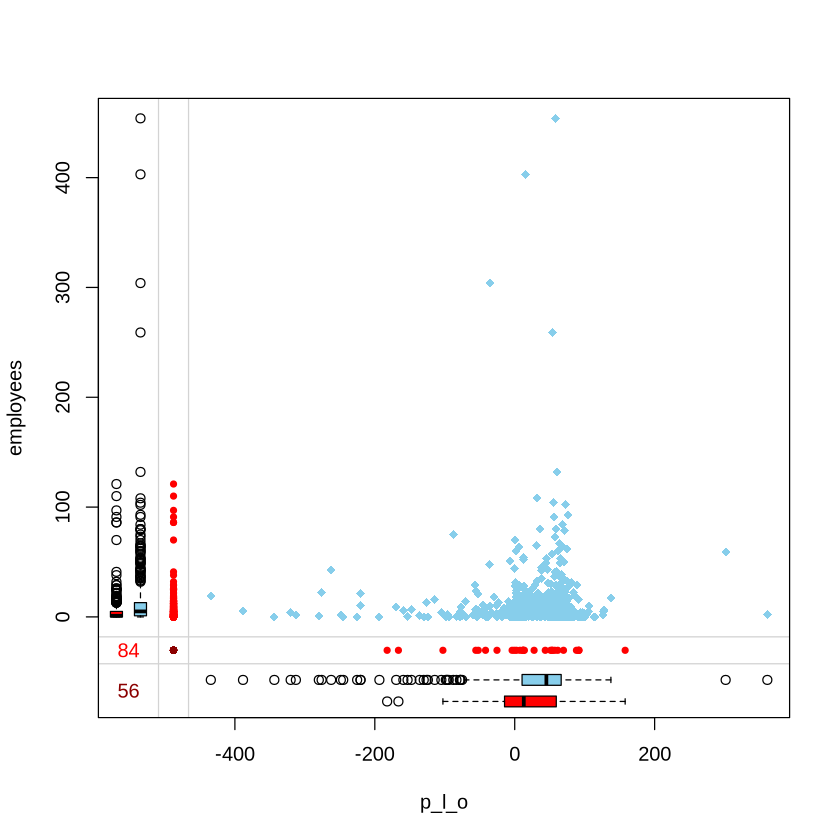

In [3]:
marginplot(aida[, c("p_l_o", "employees")], pch=c(18, 20))

Tiếp tục với `roi`

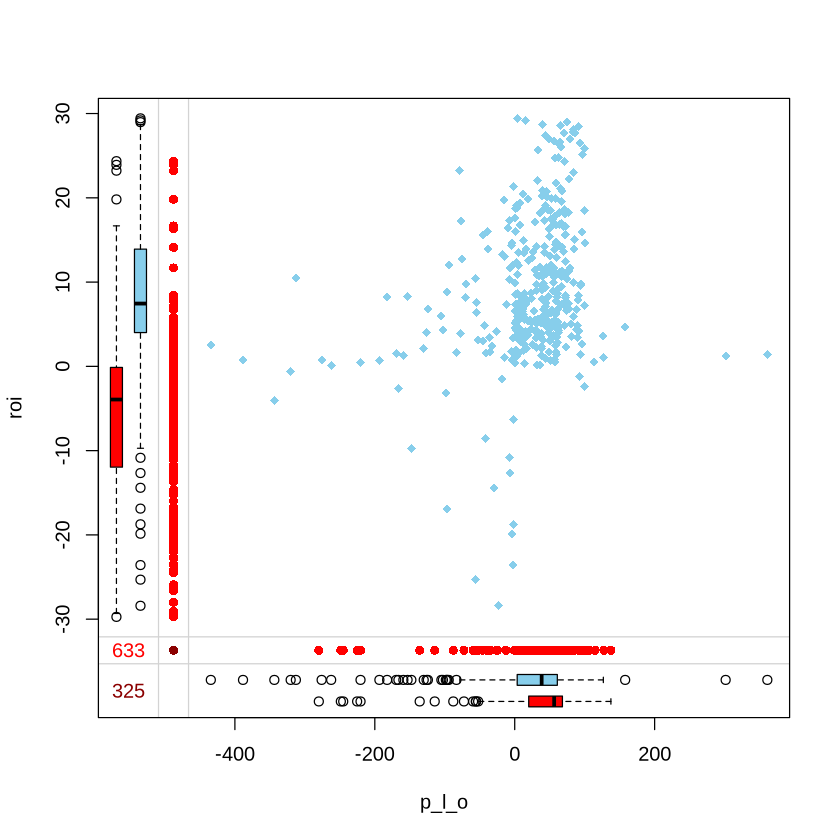

In [4]:
marginplot(aida[, c("p_l_o", "roi")], pch = c(18, 16))

## 2. Xử lý dữ liệu khuyết

## 2.1 Xử lý MCAR

Nếu:
- % dữ liệu khuyết là thấp (< 10%)
- cơ chế khuyết dữ liệu mà MCAR

**Cú pháp:** `na.omit(data)`

In [5]:
aida_cc = na.omit(aida)
glimpse(aida_cc)

Rows: 338
Columns: 15
$ cid         <int> 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21, 2…
$ province    <chr> "Milano", "Alessandria", "Vicenza", "Vicenza", "Vicenza", …
$ revenue     <int> 146019, 141401, 126609, 121147, 89497, 82429, 74621, 60774…
$ employees   <int> 403, 304, 84, 132, 57, 59, 67, 102, 12, 104, 48, 93, 11, 6…
$ total_asset <int> 127722, 224664, 45174, 48912, 16707, 23785, 89794, 49069, …
$ profit      <int> 3341, -871, 3164, 1823, 339, 732, 5573, 4912, 65, 675, -52…
$ roa         <dbl> 16.75, 1.10, 10.22, 6.12, 3.79, 1.02, 9.63, 13.79, 4.90, 7…
$ roe         <dbl> 4.56, -1.03, 13.12, 9.30, 5.93, 12.75, 17.25, 11.36, 2.31,…
$ p_l_o       <dbl> 15.62, -35.38, 68.54, 60.86, 53.51, 301.52, 64.43, 72.60, …
$ roi         <dbl> 29.19, 1.74, 10.91, 6.73, 4.71, 1.24, 16.84, 15.65, 5.90, …
$ ros         <dbl> 14.51, 1.72, 3.64, 2.46, 0.71, 0.29, 11.58, 11.09, 0.28, 2…
$ debt_equity <dbl> 0.00, 0.56, 0.46, 1.27, 1.36, 2.42, 0.59, 0.00, 0.00, 1.05…
$ cl_ta       <dbl

## 2.2. Xử lý MAR

Khi cơ chế khuyết dữ liệu là MAR, áp dụng thuật toán Multiple Imputation.

**Cú pháp:** `mice(data, m, method, printFlag=TRUE)

method = [
    
    'pmm': dữ liệu dạng số,
    
    'norm': dữ liệu dạng số,
    
    'logreg': dữ liệu nhị phân,
    
    'polyreg': dữ liệu định tính ko thứ tự,
    
    'polr': dữ liệu định tính có thứ tự 
]

In [11]:
library(mice)
aida_numeric <- aida |> select(!c("cid", "province"))
imp_aida <- mice(aida_numeric, method='pmm', m=6, printFlag = TRUE)


 iter imp variable
  1   1  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  1   2  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  1   3  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  1   4  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  1   5  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  1   6  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   1  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   2  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   3  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   4  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   5  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   6  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  3   1  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  3   2  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  3   3  employees  roa  roe  p_l_o  roi  ros  debt_equi

Warning message:
“Number of logged events: 1”


Ở đây thực hiện m = 6, nghĩa là 6 lần tạo mẫu, ta in ra kết quả:

In [12]:
imp_aida

Class: mids
Number of multiple imputations:  6 
Imputation methods:
    revenue   employees total_asset      profit         roa         roe 
         ""       "pmm"          ""          ""       "pmm"       "pmm" 
      p_l_o         roi         ros debt_equity       cl_ta        l_ta 
      "pmm"       "pmm"       "pmm"       "pmm"       "pmm"          "" 
        nwc 
         "" 
PredictorMatrix:
            revenue employees total_asset profit roa roe p_l_o roi ros
revenue           0         1           1      1   1   1     1   1   1
employees         1         0           1      1   1   1     1   1   1
total_asset       1         1           0      1   1   1     1   1   1
profit            1         1           1      0   1   1     1   1   1
roa               1         1           1      1   0   1     1   1   1
roe               1         1           1      1   1   0     1   1   1
            debt_equity cl_ta l_ta nwc
revenue               1     1    0   1
employees             

Những biến không có missing data thì nó sẽ để phuơng pháp "".

Ta dùng `stripplot()` để miêu tả dữ liệu được quan sát và dữ liệu được tái tạo

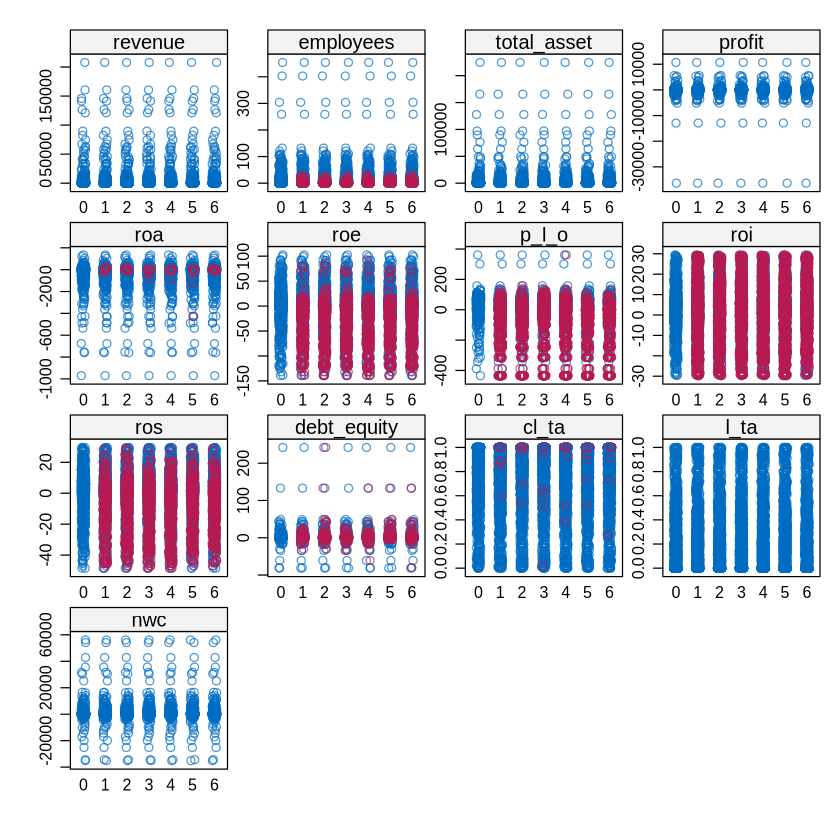

In [13]:
stripplot(imp_aida)

Ta nhận thấy các điểm (vòng tròn) màu đỏ (là các điểm được tái tạo) là trùng khớp với dữ liệu đã được quan sát $\to$ kết quả thu được là hợp lý.

### Thực hành 1: Thử các phương pháp imputation khác và nhận xét

In [17]:
imp_method_testing <- function(data, is_numeric, method) {
    imp_data = NULL
    if (is_numeric) {
        imp_data <- data |> select(!c("cid", "province"))
    }
    else {
        imp_data <- data |> select(c("province"))
    }
    
    imp_data <- mice(imp_data, method=method, m=6, printFlag = TRUE)
    return (imp_data)
}


 iter imp variable
  1   1  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  1   2  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  1   3  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  1   4  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  1   5  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  1   6  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   1  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   2  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   3  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   4  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   5  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  2   6  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  3   1  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  3   2  employees  roa  roe  p_l_o  roi  ros  debt_equity  cl_ta
  3   3  employees  roa  roe  p_l_o  roi  ros  debt_equi

Warning message:
“Number of logged events: 1”


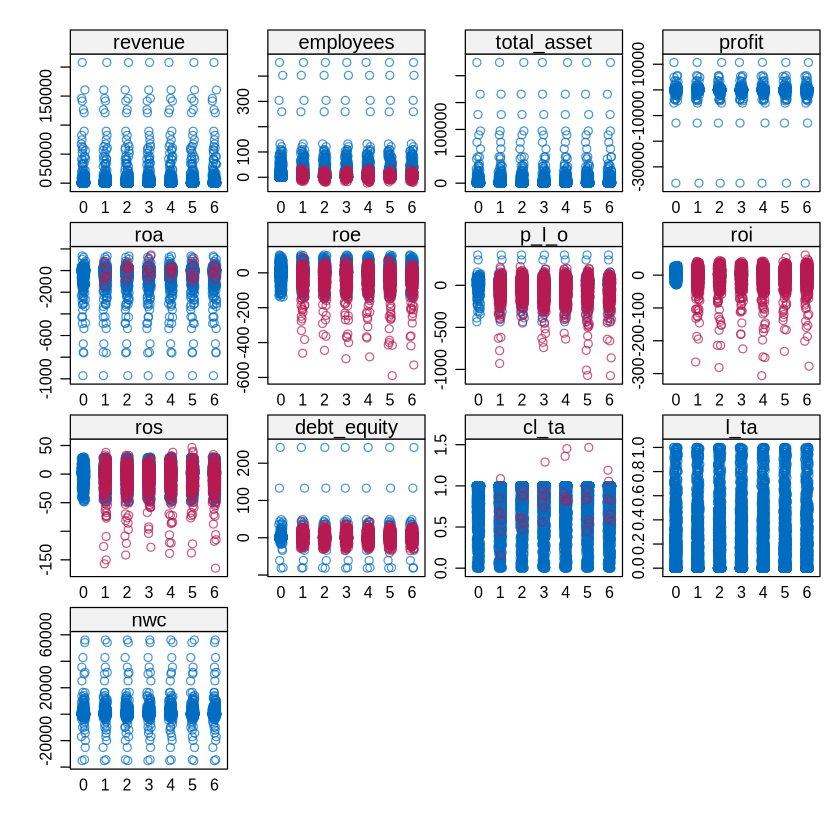

In [16]:
norm_imp <- imp_method_testing(aida, is_numeric = TRUE, method='norm')
stripplot(norm_imp)

Các biến được fill tương đối ổn, tuy nhiên biến `roe`, `p_l_o`, `roi` và `ros` có khá nhiều ngoại lai.

Tiếp theo với dữ liệu định tính, ta xem thử cột `province` là dữ liệu thế nào

In [19]:
aida |> count(province)

Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”


Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 1 is invalid in this locale

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingH

province,n
<chr>,<int>
Alessandria,301
Belluno,1
Bergamo,25
Biella,1
Bologna,17
Bolzano/Bozen,3
Brescia,10
Como,7
Cremona,4


Vậy đây là một cột dữ liệu không có thứ tự, vì đơn giản là một biến vị trí chẵn hạn